In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('adult.csv')
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [49]:
df.shape

(32560, 15)

In [50]:
names = list(df.columns)
names

['39',
 ' State-gov',
 ' 77516',
 ' Bachelors',
 ' 13',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' 2174',
 ' 0',
 ' 40',
 ' United-States',
 ' <=50K']

<AxesSubplot: >

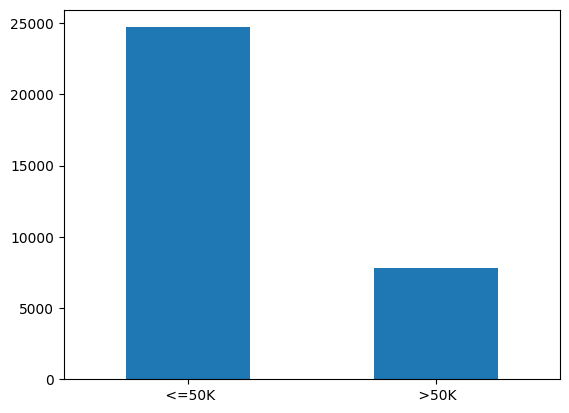

In [51]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [52]:
types = df.dtypes
types

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in range(len(types)-1):
    if types[i] == 'object':
        LE.fit_transform(df[names[i]])
        df[names[i]] = LE.transform(df[names[i]])

In [54]:
data = df.values
data[:2]

array([[50, 6, 83311, 9, 13, 2, 4, 0, 4, 1, 0, 0, 13, 39, ' <=50K'],
       [38, 4, 215646, 11, 9, 0, 6, 1, 4, 1, 0, 0, 40, 39, ' <=50K']],
      dtype=object)

In [55]:
x = data [:,:-1]
y = data [:,-1]
x.shape,y.shape

((32560, 14), (32560,))

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.45205479, 0.75      , 0.0482376 , 0.6       , 0.8       ,
       0.33333333, 0.28571429, 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.12244898, 0.95121951])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

# 3 types of knn evaluated

## Uniform weighted kNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
uniform_KNN = KNeighborsClassifier(n_neighbors=5)
uniform_KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [59]:
Y_predict = uniform_KNN.predict(X_test)

In [60]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1487


In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[5535  622]
 [ 865 1118]]
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      6157
        >50K       0.64      0.56      0.60      1983

    accuracy                           0.82      8140
   macro avg       0.75      0.73      0.74      8140
weighted avg       0.81      0.82      0.81      8140



## Distance weighted kNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
distance_KNN = KNeighborsClassifier(n_neighbors=5,weights = 'distance')
distance_KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [63]:
Y_predict = distance_KNN.predict(X_test)

In [64]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1505


In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[5527  630]
 [ 875 1108]]
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      6157
        >50K       0.64      0.56      0.60      1983

    accuracy                           0.82      8140
   macro avg       0.75      0.73      0.74      8140
weighted avg       0.81      0.82      0.81      8140



## None weighted kNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
none_KNN = KNeighborsClassifier(n_neighbors=5, weights = None)
none_KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights=None)

In [67]:
Y_predict = none_KNN.predict(X_test)

In [68]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1487


In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[5535  622]
 [ 865 1118]]
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      6157
        >50K       0.64      0.56      0.60      1983

    accuracy                           0.82      8140
   macro avg       0.75      0.73      0.74      8140
weighted avg       0.81      0.82      0.81      8140



## Logistic Regression Method

In [70]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [71]:
Y_predict = LR.predict(X_test)

In [72]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1492


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[5779  378]
 [1114  869]]
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6157
        >50K       0.70      0.44      0.54      1983

    accuracy                           0.82      8140
   macro avg       0.77      0.69      0.71      8140
weighted avg       0.80      0.82      0.80      8140

